In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
import pandas as pd
from astropy.table import Table
import glob
import time

In [4]:
file = 'table_with_rms.fits'
table = Table.read(file, format = 'fits')
df_rms = table.to_pandas()
tele_file = df_rms.telemetry_file[0].replace('/u/steverobinson', '/g/lu')
data = readsav(tele_file)

In [14]:
data.keys()

dict_keys(['a', 'b', 'uid', 'cid', 'nrec', 'rx', 'cent_origin', 'dm_origin', 'dtt_offset', 'tstamp_num', 'tstamp_str_start', 'cent_g', 'dm_servo', 'dt_servo', 'apd_imat', 'apd_sky_back', 'apd_threshold', 'header'])

In [79]:
data.tstamp_str_start

b'2017-08-08T06:08:31.676'

In [16]:
data.a.dtype.fields

mappingproxy({'CONF_ID': (dtype('O'), 0, 'conf_id'),
              'DMCOMMAND': (dtype('O'), 40, 'dmcommand'),
              'DMCOMMANDSCLIPPED': (dtype('O'), 48, 'dmcommandsclipped'),
              'OFFSETCENTROID': (dtype('O'), 24, 'offsetcentroid'),
              'RESIDUALRMS': (dtype('O'), 56, 'residualrms'),
              'RESIDUALWAVEFRONT': (dtype('O'), 32, 'residualwavefront'),
              'SUBAPINTENSITY': (dtype('O'), 16, 'subapintensity'),
              'TIMESTAMP': (dtype('O'), 8, 'timestamp'),
              'TTCOMMANDS': (dtype('O'), 64, 'ttcommands'),
              'TTCOMMANDSCLIPPED': (dtype('O'), 80, 'ttcommandsclipped'),
              'TTSTRAINGAUGE': (dtype('O'), 72, 'ttstraingauge'),
              'conf_id': (dtype('O'), 0, 'conf_id'),
              'dmcommand': (dtype('O'), 40, 'dmcommand'),
              'dmcommandsclipped': (dtype('O'), 48, 'dmcommandsclipped'),
              'offsetcentroid': (dtype('O'), 24, 'offsetcentroid'),
              'residualrms': (dty

In [85]:
dt = data.a.timestamp[0][1] - data.a.timestamp[0][0]
dt * 1e-7

0.0022727

In [88]:
exp_dt = 105.15 - 31.676
exp_dt

73.474

In [18]:
data.b.dtype.fields

mappingproxy({'APDCOUNTS': (dtype('O'), 16, 'apdcounts'),
              'CONF_ID': (dtype('O'), 0, 'conf_id'),
              'DTTCENTROIDS': (dtype('O'), 24, 'dttcentroids'),
              'DTTCOMMANDS': (dtype('O'), 32, 'dttcommands'),
              'DTTCOMMANDSCLIPPED': (dtype('O'), 48, 'dttcommandsclipped'),
              'DTTSTRAINGAUGE': (dtype('O'), 40, 'dttstraingauge'),
              'TIMESTAMP': (dtype('O'), 8, 'timestamp'),
              'apdcounts': (dtype('O'), 16, 'apdcounts'),
              'conf_id': (dtype('O'), 0, 'conf_id'),
              'dttcentroids': (dtype('O'), 24, 'dttcentroids'),
              'dttcommands': (dtype('O'), 32, 'dttcommands'),
              'dttcommandsclipped': (dtype('O'), 48, 'dttcommandsclipped'),
              'dttstraingauge': (dtype('O'), 40, 'dttstraingauge'),
              'timestamp': (dtype('O'), 8, 'timestamp')})

In [19]:
data.header

array([b'SIMPLE  =                    T / Tape is in Fits format                         ',
       b'BITPIX  =                   32 / Bits per pixel                                 ',
       b'NAXIS   =                    2 / Number of axes                                 ',
       b'NAXIS1  =                 1024 / Number of pixels in axis 1                     ',
       b'NAXIS2  =                 1024 / Number of pixels in axis 2                     ',
       b'BSCALE  =              1.00000 / Scaling factor                                 ',
       b'BZERO   =              0.00000 / Scaling zero-point                             ',
       b"OUTDIR  = '/sdata904/nirc7/2017aug08/            ' / Original directory         ",
       b"ROOTNAME= 'n                 ' / File prefix                                    ",
       b'FRAMENO =                   87 / Frame number                                   ',
       b"FILENAME= 'n0087.fits        ' / Original File name                    

In [25]:
data.a.residualwavefront[0].shape

(18707, 352)

In [78]:
data.b.dttcommands[0].shape

(5314, 2)

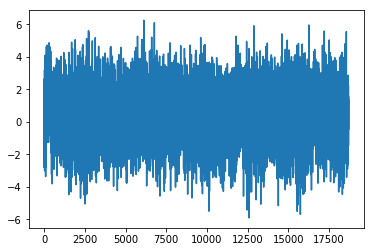

In [32]:
plt.plot(data.a.residualwavefront[0][:,0])
plt.show()

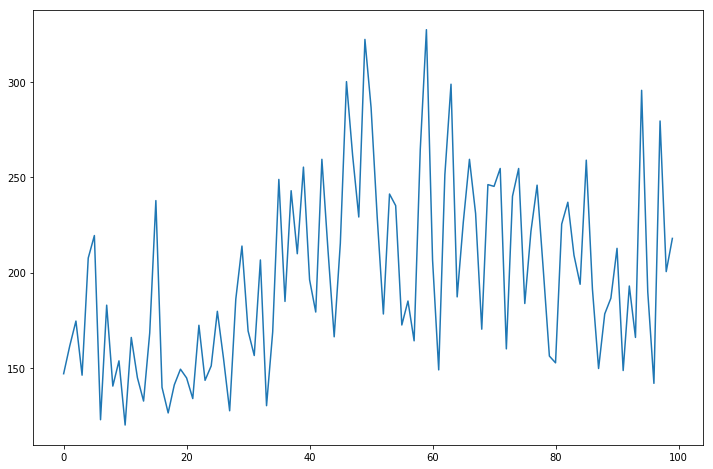

In [39]:
plt.figure(figsize = (12,8))
plt.plot(data.a.residualrms[0][0][1000:1100])
plt.show()

In [38]:
data.a.residualrms[0][0].shape

(18707,)

In [43]:
rms_mean = data.a.residualrms[0][0].mean()

In [41]:
df_rms.columns

Index(['file', 'strehl', 'rms_err', 'fwhm', 'mjd', 'epoch', 'airmass', 'itime',
       'coadds', 'band', 'az', 'dmgain', 'dtgain', 'wsfrrt', 'aolbfwhm',
       'lsamppwr', 'lgrmswf', 'xref', 'yref', 'xstrehl', 'ystrehl', 'MASS',
       'MASS_mjd', 'MASS_delta_t', 'DIMM', 'DIMM_mjd', 'DIMM_delta_t',
       'MASSPRO_half', 'MASSPRO_1', 'MASSPRO_2', 'MASSPRO_4', 'MASSPRO_8',
       'MASSPRO_16', 'MASSPRO', 'MASSPRO_mjd', 'MASSPRO_delta_t',
       'wind_speed[kts]', 'wind_speed', 'wind_direction', 'temperature',
       'relative_humidity', 'pressure[mb]', 'pressure', 'cfht_mjd',
       'cfht_delta_t', 'telemetry_file', 'residual_rms'],
      dtype='object')

In [45]:
print(df_rms.rms_err[0], rms_mean)

491.7 186.6835


In [58]:
data.a.DMCOMMAND[0].shape

(18707, 349)

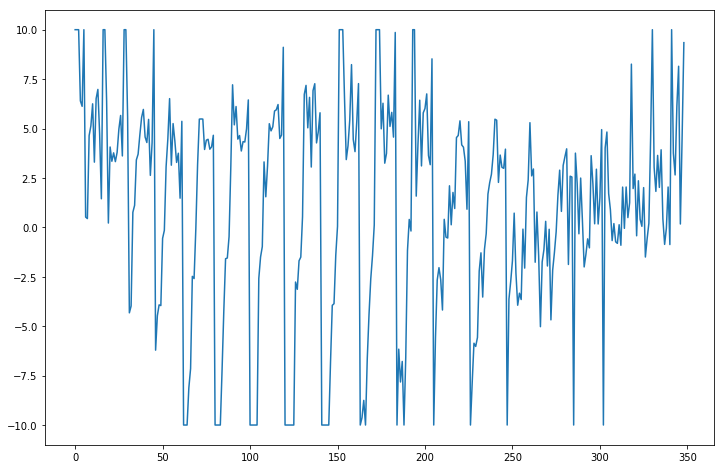

In [61]:
plt.figure(figsize = (12,8))
plt.plot(data.a.dmcommand[0][0])
plt.show()

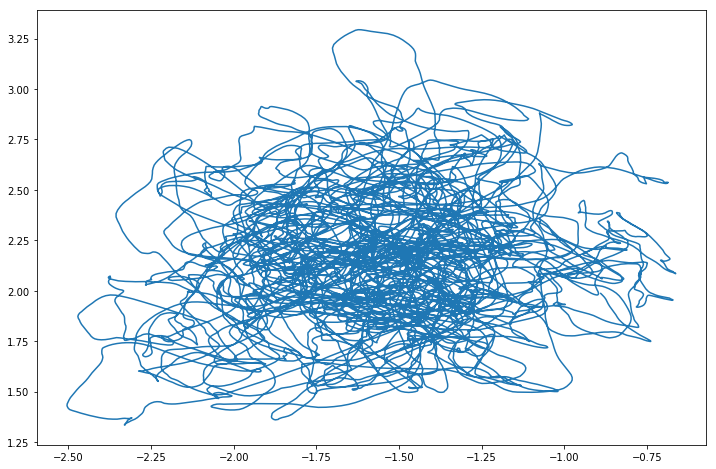

In [76]:
plt.figure(figsize = (12,8))
plt.plot(data.a.ttcommands[0][:,0],data.a.ttcommands[0][:,1])
plt.show()

In [98]:
data.a.residualwavefront[0][:,350].shape

(18707,)

In [71]:
data.a.ttcommands[0].shape

(18707, 2)

In [ ]:
ngs = glob.glob()

In [99]:
df_rms[:10]

,file,strehl,rms_err,fwhm,mjd,epoch,airmass,itime,coadds,band,...,wind_speed,wind_direction,temperature,relative_humidity,pressure[mb],pressure,cfht_mjd,cfht_delta_t,telemetry_file,residual_rms
0,c0087.fits,0.121,491.7,104.67,57973.25592,17auglgs1,1.56658,2.8,10.0,Kp,...,3.601111,93.0,2.64,24.0,620.5,0.6205,57973.256250,-0.000330,/u/steverobinson/data/keck_telemetry/20170808/...,189.216705
1,c0088.fits,0.150,465.4,93.87,57973.25651,17auglgs1,1.56489,2.8,10.0,Kp,...,3.601111,93.0,2.64,24.0,620.5,0.6205,57973.256250,0.000260,/u/steverobinson/data/keck_telemetry/20170808/...,228.859436
2,c0089.fits,0.169,451.0,85.63,57973.25709,17auglgs1,1.56328,2.8,10.0,Kp,...,3.601111,95.0,2.63,24.0,620.5,0.6205,57973.256944,0.000146,/u/steverobinson/data/keck_telemetry/20170808/...,152.201874
3,c0090.fits,0.127,485.7,101.55,57973.25779,17auglgs1,1.56134,2.8,10.0,Kp,...,4.115556,83.0,2.63,24.0,620.5,0.6205,57973.257639,0.000151,/u/steverobinson/data/keck_telemetry/20170808/...,200.610062
4,c0091.fits,0.138,475.7,95.98,57973.25838,17auglgs1,1.55976,2.8,10.0,Kp,...,3.601111,91.0,2.62,23.0,620.5,0.6205,57973.258333,0.000047,/u/steverobinson/data/keck_telemetry/20170808/...,164.941544
5,c0092.fits,0.124,488.6,100.16,57973.25898,17auglgs1,1.55820,2.8,10.0,Kp,...,4.115556,86.0,2.63,23.0,620.5,0.6205,57973.259028,-0.000048,/u/steverobinson/data/keck_telemetry/20170808/...,114.302696
6,c0093.fits,0.106,506.5,109.37,57973.25956,17auglgs1,1.55676,2.8,10.0,Kp,...,4.115556,88.0,2.63,23.0,620.5,0.6205,57973.259722,-0.000162,/u/steverobinson/data/keck_telemetry/20170808/...,140.143188
7,c0094.fits,0.081,535.9,134.24,57973.26015,17auglgs1,1.55525,2.8,10.0,Kp,...,4.115556,92.0,2.64,24.0,620.5,0.6205,57973.260417,-0.000267,/u/steverobinson/data/keck_telemetry/20170808/...,104.838692
8,c0097.fits,0.054,577.7,174.25,57973.26486,17auglgs1,1.54437,2.8,10.0,Kp,...,3.601111,89.0,2.67,24.0,620.5,0.6205,57973.264583,0.000277,/u/steverobinson/data/keck_telemetry/20170808/...,169.382095
9,c0098.fits,0.061,566.2,163.00,57973.26590,17auglgs1,1.54228,2.8,10.0,Kp,...,4.630000,93.0,2.66,23.0,620.5,0.6205,57973.265972,-0.000072,/u/steverobinson/data/keck_telemetry/20170808/...,230.655441


In [111]:
df_rms.shape[0]

956

In [116]:
# rms = []
# rms_err = []
# tt_x = []
# tt_x_err = []
# tt_y = []
# tt_y_err = []
# defocus = []
# defocus_err = []
# for i, row in df_rms[:10].iterrows():
start = time.time()
for i in range(100,df_rms.shape[0]):
    tele_file = df_rms.telemetry_file[i].replace('/u/steverobinson', '/g/lu')
    data = readsav(tele_file)
    rms.append(data.a.residualrms[0][0].mean())
    rms_err.append(data.a.residualrms[0][0].std())
    tt_x.append(data.a.residualwavefront[0][:,349].mean())
    tt_x_err.append(data.a.residualwavefront[0][:,349].std())
    tt_y.append(data.a.residualwavefront[0][:,350].mean())
    tt_y_err.append(data.a.residualwavefront[0][:,350].std())
    defocus.append(data.a.residualwavefront[0][:,351].mean())
    defocus_err.append(data.a.residualwavefront[0][:,351].std())
    
print(time.time() - start)

2686.530900001526


In [118]:
len(rms)

956

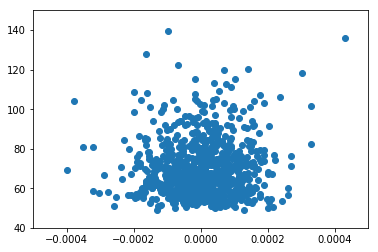

In [120]:
plt.scatter(tt_x, df_rms.fwhm)
plt.xlim(-0.0005,0.0005)
plt.ylim(40,150)
plt.show()

Text(0,0.5,'FWHM [milliarcsec]')

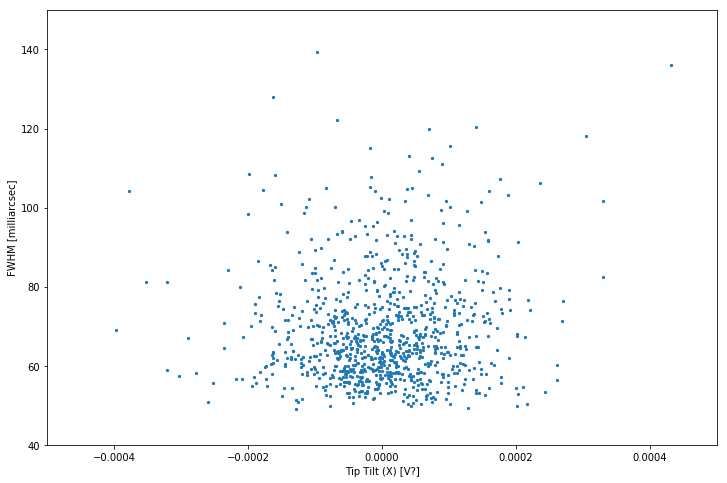

In [129]:
plt.figure(figsize = (12,8))
plt.scatter(tt_x,df_rms.fwhm, s = 5)
plt.xlim(-0.0005,0.0005)
plt.ylim(40,150)
plt.xlabel('Tip Tilt (X) [V?]')
plt.ylabel('FWHM [milliarcsec]')

Text(0,0.5,'FWHM [milliarcsec]')

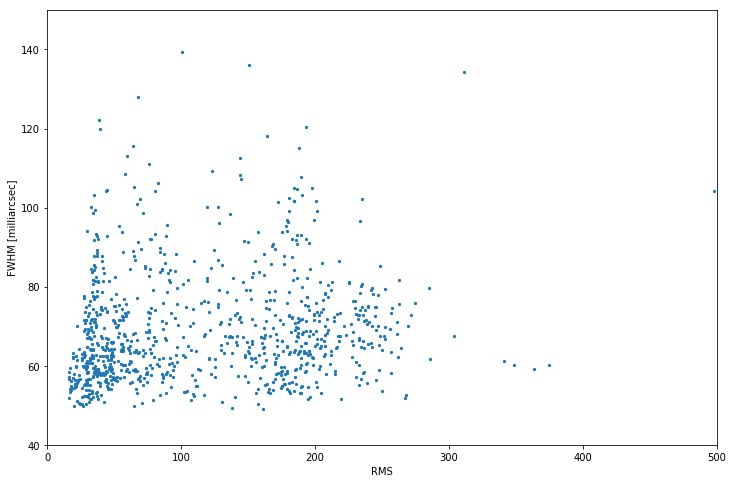

In [131]:
plt.figure(figsize = (12,8))
plt.scatter(rms,df_rms.fwhm, s = 5)
plt.xlim(0, 500)
plt.ylim(40,150)
plt.xlabel('RMS')
plt.ylabel('FWHM [milliarcsec]')

In [132]:
df_rms['residual_rms'] = rms
df_rms['rms_err'] = rms_err
df_rms['tt_x'] = tt_x
df_rms['tt_x_err'] = tt_x_err
df_rms['tt_y'] = tt_y
df_rms['tt_y_err'] = tt_y_err
df_rms['defocus'] = defocus
df_rms['defocus_err'] = defocus_err

In [133]:
t = Table.from_pandas(df_rms)

In [134]:
t.write('table_rms_TT.fits', format = 'fits')

In [ ]:
t = 